# DataCamp - Project - Analyzing crime in Los Angeles

In [3]:
# load data folder
data_folder = "/Users/miguelbaptista/Library/CloudStorage/OneDrive-Personal/Data_Science/Python/MOOC/DataCamp/ficheiros_2/"

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 0) Load files

In [6]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
# Load dataframe 
crimes = pd.read_csv(data_folder + "crimes.csv", dtype={"TIME OCC": str}, index_col=0)

print(crimes.shape)
crimes.head()

(8333, 12)


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
index,,,,,,,,,,,,
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


## 1) Which hour has the highest frequency of crimes? 

peak_crime_hour:  12


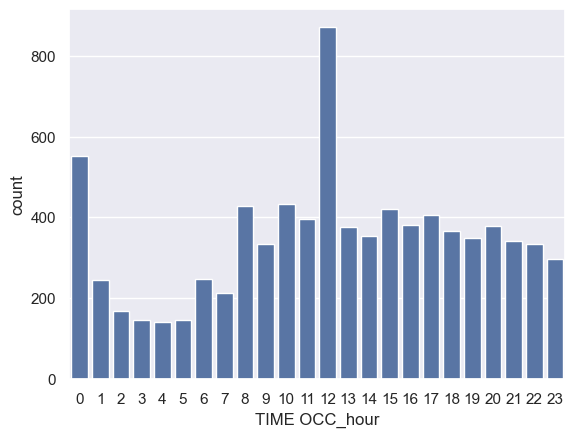

In [9]:
# 1) Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.

crimes["TIME OCC_hour"] = [int(i[:2]) for i in crimes["TIME OCC"]]

crime_hours_count = crimes["TIME OCC_hour"].value_counts()
crime_hours_count

# highest value
peak_crime_hour = crime_hours_count.index[0]
print("peak_crime_hour: ", peak_crime_hour)

# plot
sns.barplot(crime_hours_count)
plt.show()

In [10]:
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,TIME OCC_hour
index,,,,,,,,,,,,,
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9


## 2) Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? 

In [12]:
# 2) Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? 
# Save as a string variable called peak_night_crime_location.

# filter for the required times
crimes_filter_df = crimes[crimes["TIME OCC_hour"].isin([22, 23, 0, 1, 2, 3])]
print(crimes_filter_df.shape)
crimes_filter_df.head()

(1743, 13)


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,TIME OCC_hour
index,,,,,,,,,,,,,
8,231207476,2023-02-27,2020-08-15,0001,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV,0
10,221711184,2022-06-15,2020-05-15,0155,Devonshire,THEFT OF IDENTITY,27,M,B,NaN,Invest Cont,8300 WHITE OAK AV,1
30,221314362,2022-07-11,2020-04-07,0001,Newton,THEFT OF IDENTITY,53,F,H,NaN,Invest Cont,1600 E OLYMPIC BL,0
33,231307252,2023-03-03,2020-07-05,2305,Newton,THEFT OF IDENTITY,22,F,B,NaN,Invest Cont,6600 S BROADWAY,23
36,221614254,2022-11-13,2020-01-01,0001,Foothill,THEFT OF IDENTITY,22,F,H,NaN,Invest Cont,10200 TELFAIR AV,0


In [13]:
crimes_filter_df["AREA NAME"].value_counts()

AREA NAME
77th Street    135
Central        115
Hollywood      110
Olympic         89
Southwest       88
Newton          87
Southeast       87
Van Nuys        86
Rampart         84
N Hollywood     82
Northeast       80
Pacific         78
West Valley     78
Foothill        77
Topanga         76
Wilshire        71
West LA         70
Hollenbeck      65
Devonshire      64
Mission         63
Harbor          58
Name: count, dtype: int64

In [14]:
# show
peak_night_crime_location = crimes_filter_df["AREA NAME"].value_counts().index[0]

print(peak_night_crime_location)

77th Street


## 3) Identify the number of crimes committed against victims of different age groups. 

In [16]:
# 3) Identify the number of crimes committed against victims of different age groups. 

#  Save as a pandas Series called victim_ages, with age group labels 
# "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

In [17]:
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,TIME OCC_hour
index,,,,,,,,,,,,,
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9


In [18]:
# check type
crimes["Vict Age"]

index
0       27
1       60
2       28
3       37
4       79
        ..
8328    22
8329    33
8330    44
8331    46
8332    49
Name: Vict Age, Length: 8333, dtype: int64

In [19]:
# max age
crimes["Vict Age"].max()

99

In [20]:
#  Save as a pandas Series called victim_ages, with age group labels 
# "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

max_age = crimes["Vict Age"].max()
ages = [(0, 17), (18, 25), (26, 34), (35, 44), (45, 54), (55, 64), (65, max_age)]

victim_ages_dict = {}
for ind, i in enumerate(ages):
    if ind < len(ages)-1:
        index_name = str(i[0])+"-"+str(i[1])
        frequency_of_crimes = crimes[(crimes["Vict Age"] >= i[0]) & (crimes["Vict Age"] <= i[1])].shape[0]
        victim_ages_dict[index_name] = frequency_of_crimes

    else:
        index_name = str(i[0])+"+"
        frequency_of_crimes = crimes[crimes["Vict Age"] >= i[0]].shape[0]
        victim_ages_dict[index_name] = frequency_of_crimes


# show dict
victim_ages_dict

{'0-17': 277,
 '18-25': 1272,
 '26-34': 1996,
 '35-44': 1810,
 '45-54': 1292,
 '55-64': 998,
 '65+': 688}

In [21]:
list(victim_ages_dict.values())

[277, 1272, 1996, 1810, 1292, 998, 688]

In [22]:
#  Save as a pandas Series called victim_ages, with age group labels 

# Labels and bins
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
bins = [0, 17, 25, 34, 44, 54, 64, max_age]
# bins = list(victim_ages_dict.values())

# pd.cut()
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"], labels=labels, bins=bins)
crimes[["Vict Age", "Age Bracket"]]


,Vict Age,Age Bracket
index,,
0,27,26-34
1,60,55-64
2,28,26-34
3,37,35-44
4,79,65+
...,...,...
8328,22,18-25
8329,33,26-34
8330,44,35-44


In [23]:
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,TIME OCC_hour,Age Bracket
index,,,,,,,,,,,,,,
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11,26-34
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16,55-64
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12,26-34
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6,35-44
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9,65+


In [24]:
# Identify the number of crimes committed against victims of different age groups. 

crimes["Age Bracket"].value_counts()

Age Bracket
26-34    1996
35-44    1810
45-54    1292
18-25    1272
55-64     998
65+       688
0-17      277
Name: count, dtype: int64

In [25]:
# Find the category with the largest frequency
victim_ages = crimes["Age Bracket"].value_counts()
print(victim_ages)

Age Bracket
26-34    1996
35-44    1810
45-54    1292
18-25    1272
55-64     998
65+       688
0-17      277
Name: count, dtype: int64
